In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline

In [25]:
car_dataset = pd.read_csv('C:/Users/GLORIA UDOH/CarDataset.csv')

In [26]:
car_dataset.head(10)

,Id,year,brand,full_model_name,price,distance_travelled(kms),fuel_type,city,brand_rank
0,1,2016,Honda,Honda Brio S MT,425000,9680,Petrol,Mumbai,7
1,2,2012,Nissan,Nissan Sunny XV Diesel,325000,119120,Diesel,Mumbai,11
2,3,2017,Toyota,Toyota Fortuner 2.8 4x2 MT [2016-2020],2650000,64593,Diesel,Thane,1
3,4,2017,Mercedes-Benz,Mercedes-Benz E-Class E 220d Expression [2019-...,4195000,25000,Diesel,Mumbai,2
4,5,2012,Hyundai,Hyundai Verna Fluidic 1.6 CRDi SX,475000,23800,Diesel,Mumbai,14
5,6,2012,Hyundai,Hyundai i20 Sportz 1.2 BS-IV,335000,45000,Petrol,Mumbai,14
6,7,2019,Toyota,Toyota Glanza V,750000,19500,Petrol,Mumbai,1
7,8,2018,Mercedes-Benz,Mercedes-Benz GLE 250 d,5500000,32000,Diesel,Mumbai,2
8,9,2017,Hyundai,Hyundai Grand i10 Sportz (O) AT 1.2 Kappa VTVT...,565000,44329,Petrol,Mumbai,14
9,10,2015,Maruti Suzuki,Maruti Suzuki Swift Dzire ZXI,510000,48286,Petrol,Mumbai,32


In [27]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1725 entries, 0 to 1724
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Id                       1725 non-null   int64 
 1   year                     1725 non-null   int64 
 2   brand                    1725 non-null   object
 3   full_model_name          1725 non-null   object
 4   price                    1725 non-null   int64 
 5   distance_travelled(kms)  1725 non-null   int64 
 6   fuel_type                1725 non-null   object
 7   city                     1725 non-null   object
 8   brand_rank               1725 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 121.4+ KB


In [28]:
car_dataset.describe()

,Id,year,price,distance_travelled(kms),brand_rank
count,1725.000000,1725.000000,1.725000e+03,1725.000000,1725.000000
mean,863.000000,2015.390725,1.494837e+06,53848.256232,15.731014
std,498.108924,3.207504,1.671658e+06,44725.541963,12.951122
min,1.000000,1990.000000,6.250000e+04,350.000000,1.000000
25%,432.000000,2013.000000,5.450000e+05,29000.000000,5.000000
50%,863.000000,2016.000000,8.750000e+05,49000.000000,14.000000
75%,1294.000000,2018.000000,1.825000e+06,70500.000000,24.000000
max,1725.000000,2021.000000,1.470000e+07,790000.000000,81.000000


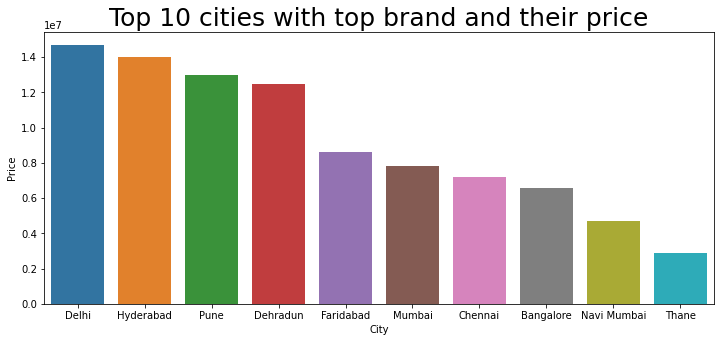

In [89]:
Top_10_city = car_dataset.groupby(by = 'city').max()[['price', 'brand_rank']].sort_values(by = ['price'], 
ascending = False).reset_index()
fig = plt.figure(figsize=(12,5))
plt.title('Top 10 cities with top brand and their price', size=25)
ax = sns.barplot(data = Top_10_city.iloc[:10], y = 'price', x = 'city', linewidth = 2, edgecolor = 'none')
plt.xlabel('City')
plt.ylabel('Price')
plt.show()

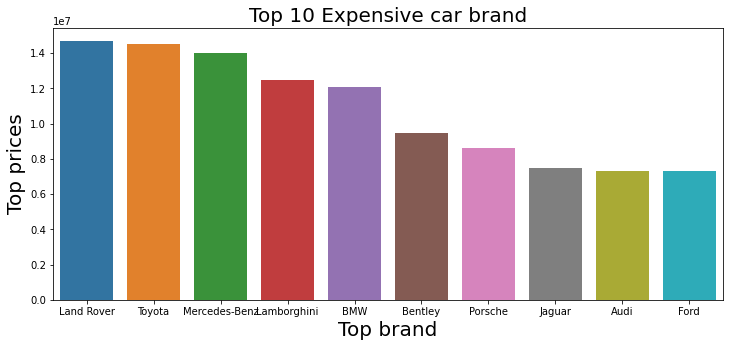

In [90]:
top_10_brand = car_dataset.groupby(by = 'brand').max()[['price', 'brand_rank']].sort_values(by = ['price'], ascending = False).reset_index()
fig = plt.figure(figsize=(12,5))
ax = sns.barplot(data = top_10_brand.iloc[:10], y = 'price', x = 'brand', linewidth = 2, edgecolor = 'none')
plt.title('Top 10 Expensive car brand', size=20)
plt.ylabel('Top prices', size=20)
plt.xlabel('Top brand', size=20)
plt.show()

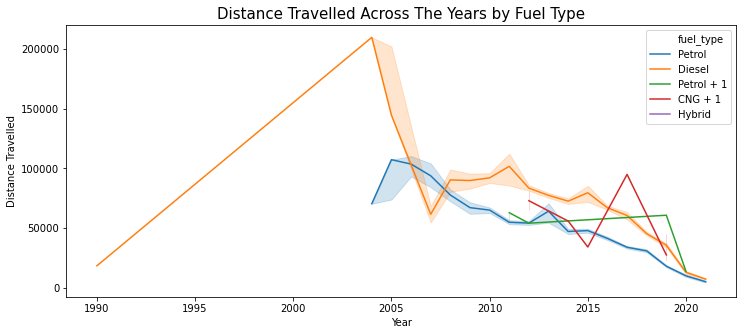

In [91]:
fig = plt.figure(figsize=(12,5))
ax = sns.lineplot(data = car_dataset, x = 'year', y = 'distance_travelled(kms)', hue = 'fuel_type', ci = 50, markers = True)
plt.title('Distance Travelled Across The Years by Fuel Type', size=15)
plt.xlabel('Year', size=10)
plt.ylabel('Distance Travelled', size=10)
plt.show()

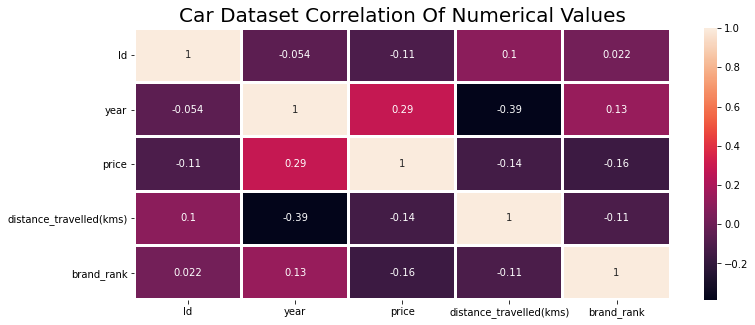

In [92]:
plt.figure(figsize=(12,5))
corr_brand = car_dataset.corr(method='pearson')
sns.heatmap(corr_brand, annot=True, linewidth=2, edgecolor='red')
plt.title('Car Dataset Correlation Of Numerical Values', size=20)
plt.show()

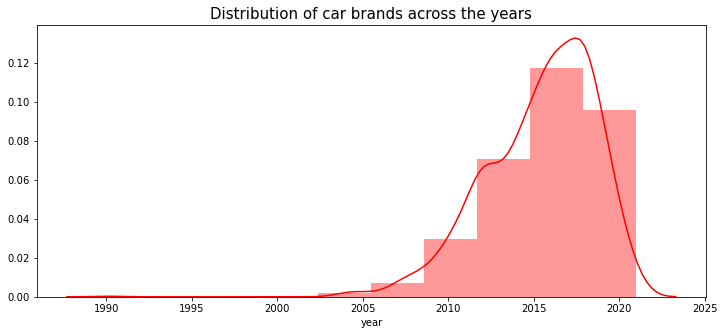

In [93]:
plt.figure(figsize=(12,5))
ax = sns.distplot(car_dataset.year, bins=10, color='red')
plt.title('Distribution of car brands across the years', size=15)
ax